**Load library as usual**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

**Load data**

In [6]:
df = pd.concat(map(pd.read_csv, ['features/' + i for i in os.listdir('features/')]))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


**Show some info**

In [7]:
df.head()

,Accuracy,Bearing,Speed,Unnamed: 0,acceleration_x,acceleration_y,acceleration_z,bookingID,gyro_x,gyro_y,gyro_z,second
0,4.000,203.000000,6.480000,NaN,1.001973,9.745000,-0.790087,1.194001e+12,-0.066046,0.019175,0.044741,246.0
1,3.000,311.000000,0.340365,NaN,0.452518,9.273026,3.098191,1.099512e+12,0.005382,0.002155,-0.001436,66.0
2,10.000,142.807999,2.050000,NaN,0.018542,-8.041156,-4.960114,9.620727e+11,0.004223,-0.014875,0.007397,1552.0
3,8.000,171.205292,17.608448,NaN,-0.290698,-8.295367,-3.049042,1.142461e+12,0.033618,0.046224,0.030559,277.0
4,19.379,0.000000,0.000000,NaN,0.675613,8.846130,1.852508,4.123169e+11,-0.008652,0.003693,0.001160,148.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16135561 entries, 0 to 1613552
Data columns (total 12 columns):
Accuracy          float64
Bearing           float64
Speed             float64
Unnamed: 0        object
acceleration_x    float64
acceleration_y    float64
acceleration_z    float64
bookingID         float64
gyro_x            float64
gyro_y            float64
gyro_z            float64
second            float64
dtypes: float64(11), object(1)
memory usage: 1.6+ GB


In [9]:
df.describe()

,Accuracy,Bearing,Speed,acceleration_x,acceleration_y,acceleration_z,bookingID,gyro_x,gyro_y,gyro_z,second
count,1.613556e+07,1.613556e+07,1.613556e+07,1.613556e+07,1.613556e+07,1.613556e+07,1.613556e+07,1.613556e+07,1.613556e+07,1.613556e+07,1.613556e+07
mean,1.161035e+01,1.689684e+02,9.006543e+00,6.914529e-02,4.468976e+00,8.942974e-01,8.184819e+11,-1.710847e-03,2.800733e-04,-2.569688e-04,3.803484e+03
std,8.691672e+01,1.072966e+02,8.106415e+00,1.424161e+00,8.130664e+00,3.251549e+00,4.952476e+11,1.445619e-01,3.400630e-01,1.480824e-01,1.436686e+06
min,7.500000e-01,0.000000e+00,-2.000000e+00,-7.841969e+01,-7.299412e+01,-7.844842e+01,0.000000e+00,-4.845575e+01,-7.488861e+01,-5.355445e+01,0.000000e+00
25%,3.900000e+00,7.800000e+01,1.020000e+00,-5.081238e-01,-2.022476e+00,-9.316101e-01,3.779571e+11,-2.678888e-02,-2.993851e-02,-1.876500e-02,2.410000e+02
50%,4.250000e+00,1.688700e+02,7.530000e+00,6.137085e-02,9.081485e+00,7.757450e-01,8.074539e+11,-6.432411e-04,2.645046e-04,-3.542004e-05,5.200000e+02
75%,8.000000e+00,2.629840e+02,1.548000e+01,6.350620e-01,9.709778e+00,2.750938e+00,1.254130e+12,2.330639e-02,3.143085e-02,1.823425e-02,8.630000e+02
max,6.070101e+03,3.599995e+02,1.480186e+02,6.687346e+01,7.505589e+01,7.805576e+01,1.709397e+12,3.983975e+01,8.031496e+01,6.630078e+01,1.495797e+09


In [10]:
df.columns

Index(['Accuracy', 'Bearing', 'Speed', 'Unnamed: 0', 'acceleration_x',
       'acceleration_y', 'acceleration_z', 'bookingID', 'gyro_x', 'gyro_y',
       'gyro_z', 'second'],
      dtype='object')

*reformat*

In [11]:
df = df[['bookingID','second','Accuracy', 'Bearing', 'Speed','acceleration_x',
       'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y',
       'gyro_z']]

**Data explore**

In [12]:
#unique trip count
df['bookingID'].nunique()

20000

In [13]:
#trip duration
trip_duration = df.pivot_table(index = 'bookingID',values='second',aggfunc='max')

In [14]:
trip_duration['duration_min'] = trip_duration['second']/60

In [15]:
trip_duration.describe()

,second,duration_min
count,2.000000e+04,2.000000e+04
mean,1.995713e+05,3.326189e+03
std,1.373137e+07,2.288561e+05
min,1.190000e+02,1.983333e+00
25%,5.540000e+02,9.233333e+00
50%,8.540000e+02,1.423333e+01
75%,1.221000e+03,2.035000e+01
max,1.495797e+09,2.492995e+07


In [16]:
#min trip: 2min, #0.5 quantile: 14min, #0.75 quantile: 20min, max trip: 2.492995e+07 min?
#Consider trip < 1hour


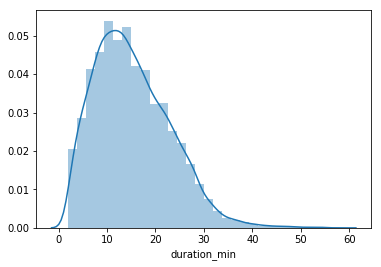

In [17]:
sns.distplot(trip_duration[trip_duration['second']<60*60]['duration_min'],bins=30)

In [18]:
#trip > 35 mins -> outliner
model_trip = trip_duration[trip_duration['second']<35*60]

In [19]:
model_df = df[df['bookingID'].isin(model_trip.index)]

In [20]:
model_df.describe()

,bookingID,second,Accuracy,Bearing,Speed,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,1.551435e+07,1.551435e+07,1.551435e+07,1.551435e+07,1.551435e+07,1.551435e+07,1.551435e+07,1.551435e+07,1.551435e+07,1.551435e+07,1.551435e+07
mean,8.171206e+11,5.710128e+02,1.114529e+01,1.690866e+02,8.997881e+00,7.088026e-02,4.505070e+00,8.948446e-01,-1.680601e-03,2.653644e-04,-2.278518e-04
std,4.951713e+11,4.081543e+02,8.369600e+01,1.072247e+02,8.090107e+00,1.406767e+00,8.122523e+00,3.225992e+00,1.403092e-01,3.433398e-01,1.441309e-01
min,0.000000e+00,0.000000e+00,7.500000e-01,0.000000e+00,-1.719776e+00,-7.841969e+01,-7.299412e+01,-7.844842e+01,-3.347175e+01,-7.488861e+01,-3.746538e+01
25%,3.779571e+11,2.350000e+02,3.900000e+00,7.800000e+01,1.034720e+00,-5.066284e-01,-1.502502e+00,-9.314297e-01,-2.673441e-02,-3.007614e-02,-1.876229e-02
50%,7.988639e+11,5.050000e+02,4.193000e+00,1.690000e+02,7.530061e+00,6.225114e-02,9.088667e+00,7.757450e-01,-6.401868e-04,2.593994e-04,-3.290812e-05
75%,1.254130e+12,8.320000e+02,8.000000e+00,2.630000e+02,1.544000e+01,6.344818e-01,9.710882e+00,2.750938e+00,2.334727e-02,3.145083e-02,1.824958e-02
max,1.709397e+12,2.099000e+03,6.070101e+03,3.599995e+02,1.480186e+02,6.687346e+01,7.281000e+01,7.805576e+01,3.983975e+01,8.031496e+01,6.630078e+01


In [21]:
#Accuracy: 
#The United States government currently claims 4 meter RMS (7.8 meter 95% Confidence Interval) horizontal accuracy for civilian (SPS) GPS, so we drop trip got mean Accuracy > 7.8m and point with Accuracy > 7.8m
Accuracy_df = df.pivot_table(index = 'bookingID',values='Accuracy',aggfunc='mean')
model_df = df[df['bookingID'].isin(Accuracy_df[Accuracy_df['Accuracy']<7.8].index)]
model_df = model_df[model_df['Accuracy']<7.8]

In [22]:
#Speed:
model_df['Speed'].describe()

count    9.895088e+06
mean     8.960250e+00
std      8.165093e+00
min     -1.719776e+00
25%      3.000000e-01
50%      7.629081e+00
75%      1.553760e+01
max      3.912000e+01
Name: Speed, dtype: float64

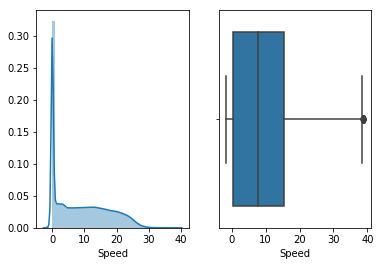

In [23]:
fig,ax = plt.subplots(1,2)
sns.distplot(model_df['Speed'],ax=ax[0])
sns.boxplot(model_df['Speed'],ax=ax[1])
#Speed: cant be negative:
model_df = model_df[model_df['Speed']>=0]

In [24]:
model_df.head()

,bookingID,second,Accuracy,Bearing,Speed,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,1.194001e+12,246.0,4.0,203.0,6.480000,1.001973,9.745000,-0.790087,-0.066046,0.019175,0.044741
1,1.099512e+12,66.0,3.0,311.0,0.340365,0.452518,9.273026,3.098191,0.005382,0.002155,-0.001436
8,8.589935e+09,430.0,3.9,22.0,13.840000,-0.452377,9.679642,2.923172,-0.003677,0.009720,-0.026703
9,5.841156e+11,1044.0,4.0,199.0,26.240519,-6.914666,2.839610,6.498062,0.011221,-0.035768,0.039490
11,1.554778e+12,72.0,6.0,332.0,12.075355,-1.972882,9.711179,1.735849,0.011042,0.158532,-0.011837


In [26]:
model_df.to_csv('model_df.csv',index=False)

In [ ]:
#model_df.to_csv('model_df.csv')